In [1]:
#from tweepy.streaming import StreamListener
import tweepy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# To manipulate the twitter imported data
import json
import pandas as pd

In [2]:
access_token = "83580937-l65hdEJWUZVJaQl5zj0l760KMxuAyYJzKQoodPn4H"
access_token_secret = "58qxbGTiapzWhxVoPFdgNFnJVLsRJu26Ifm0RlreuSMeO"
consumer_key = "I81JpllhIlWYTgEJVkNmcC1k5"
consumer_secret = "trCOS79OfTiWjOC0EzicpIb4VeLWu5tw4a4Ihm30IiAvfGCrmB"

In [3]:
# Connecting to twitter using user credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
# Searching about any keyword in all the latest tweets
tweets_data=api.search('Trump',count=1000, lang='en', include_rts=False, tweet_mode="extended")
print ("number of tweets found: "+ str(len(tweets_data)))

number of tweets found: 100


In [5]:
tweets = pd.DataFrame()

In [6]:
for status in tweets_data:
    tweets=tweets.append(status._json,ignore_index=True)

In [7]:
# Looking at the data collected
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,place,retweet_count,retweeted,retweeted_status,source,truncated,user,quoted_status_id,quoted_status_id_str,possibly_sensitive
0,None,None,Tue Jun 02 10:24:30 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @mboorstein: The Episcopal bishop of DC – w...,None,1.267764e+18,...,None,42735.0,0.0,{'created_at': 'Tue Jun 02 00:02:16 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 355435964, 'id_str': '355435964', 'name...",NaN,NaN,NaN
1,None,None,Tue Jun 02 10:24:30 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @TheGREATHoudin2: PERSPECTIVE: I am only go...,None,1.267764e+18,...,None,10.0,0.0,{'created_at': 'Tue Jun 02 06:04:58 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 18534889, 'id_str': '18534889', 'name':...",NaN,NaN,NaN
2,None,None,Tue Jun 02 10:24:30 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @existentialfish: CNN reports that Trump us...,None,1.267764e+18,...,None,10196.0,0.0,{'created_at': 'Tue Jun 02 00:20:44 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 2258047837, 'id_str': '2258047837', 'na...",NaN,NaN,NaN
3,None,None,Tue Jun 02 10:24:30 +0000 2020,"[0, 258]","{'hashtags': [{'text': 'AmericaOrTrump', 'indi...",0.0,0.0,#AmericaOrTrump\n\nFalse analogy. President Tr...,None,1.267764e+18,...,None,0.0,0.0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,"{'id': 1182266342667407360, 'id_str': '1182266...",NaN,NaN,NaN
4,None,None,Tue Jun 02 10:24:29 +0000 2020,"[14, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,"@YourAnonNews Anonymous, everyone is waiting f...",None,1.267764e+18,...,None,0.0,0.0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 1258080006535884811, 'id_str': '1258080...",NaN,NaN,NaN


In [8]:
tweets['full_text'].head(10)

0    RT @mboorstein: The Episcopal bishop of DC – w...
1    RT @TheGREATHoudin2: PERSPECTIVE: I am only go...
2    RT @existentialfish: CNN reports that Trump us...
3    #AmericaOrTrump\n\nFalse analogy. President Tr...
4    @YourAnonNews Anonymous, everyone is waiting f...
5    RT @honeyrainfall: "name one time Trump was ra...
6                       RT @mjfree: FUCK DONALD TRUMP!
7    RT @charliekirk11: Donald Trump must be re-ele...
8    RT @haveigotnews: As Donald Trump poses on the...
9    RT @HoldOnHobi: two girls (trump supporters) p...
Name: full_text, dtype: object

In [9]:
# Reading positive and negative words list
PositiveWords=pd.read_table('E:/Work/Data Science/Python/Python Datasets/Python Datasets/Sentiment Analysis/Positive_words.txt',encoding='latin-1')
NegativeWords=pd.read_table('E:/Work/Data Science/Python/Python Datasets/Python Datasets/Sentiment Analysis/Negative_words.txt',encoding='latin-1')

In [10]:
# Defining a function to take a sentence as input and provide a sentiment fo it.
def ComputeSentimentScore(inputSentence):
    import re
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    # converting every word in lowercase
    newSentence=inputSentence.lower()
    
    # Removing everything which is not alphabets
    WordList= re.sub(r'[^a-z A-Z]',r'',newSentence)
    
    # Splitting the sentence into list of words
    WordList=WordList.split()
    
    # Iterate every word and check if it is present in the positive or negative word list
    for newWord in WordList:
        #print(newWord)
        if (newWord in NegativeWords.values):
            NegativeScore+=1
        if (newWord in PositiveWords.values):
            PositiveScore+=1
    #print('Final Positive Score:',PositiveScore)
    #print('Final Negative Score:',NegativeScore)
    #print('Overall Score:',PositiveScore-NegativeScore)
    
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive'
    else:
        OverallSentiment='Negative'
    return(OverallSentiment)

In [11]:
# Calling sentiment score function for every tweet
tweets['Sentiment']=tweets['full_text'].apply(ComputeSentimentScore)

# Printing sample rows to understand
tweets[['full_text', 'Sentiment']].head()

,full_text,Sentiment
0,RT @mboorstein: The Episcopal bishop of DC – w...,Negative
1,RT @TheGREATHoudin2: PERSPECTIVE: I am only go...,Negative
2,RT @existentialfish: CNN reports that Trump us...,Positive
3,#AmericaOrTrump\n\nFalse analogy. President Tr...,Positive
4,"@YourAnonNews Anonymous, everyone is waiting f...",Negative


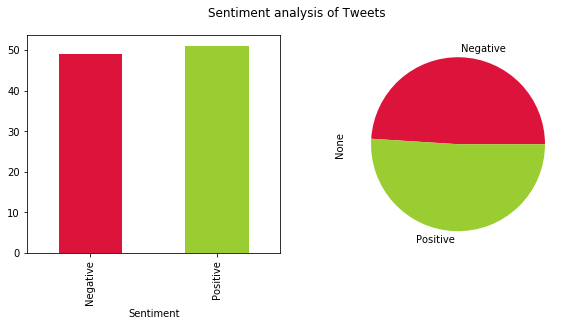

In [12]:
# Visualizing the overall sentiment distribution
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Tweets")

# Grouping the data
GroupedData=tweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson','yellowgreen'])

In [13]:
# Extracting only the Tweet text
Tweet_Texts=tweets['full_text'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

In [14]:
# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)


# Deleting any word which is less than 4-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,4}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned

' episcopal bishop oversees church trump stopped tells outraged perspective going please please realize immediately before trump governor reports trump rubber bullets peaceful protesters photo after being upset about americaortrump nfalse analogy president trump elected anything wrong certainly nothing illegal democratic party wants power wonder democrat forgiven clinton obama coverage anonymous everyone waiting donald trump account trump racist nixon administration trump refusing black donald trump donald trump elected civilization depends donald trump poses steps church holding bible christians everywhere recall where girls trump supporters pretended protest madison destroyed property first picture donald trump wikipedia donald marble collegiate church church reacted stating support trump racist fixed white house propaganda video trump going church share credits within hiding bunker embarrassed police peaceful protesters president trump npass support trump lives matter movement lives

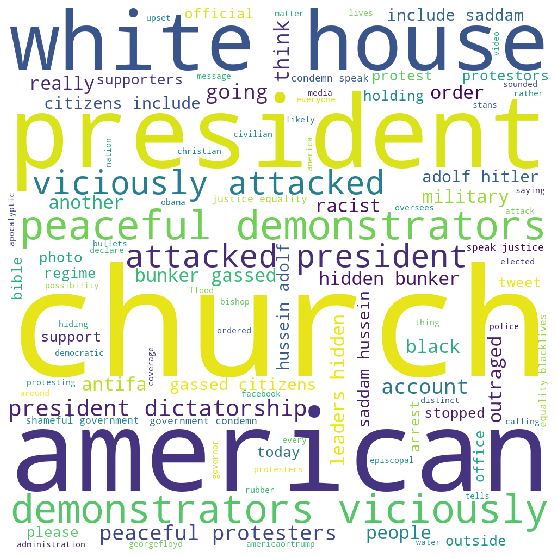

In [17]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt

# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['donald','trump']

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=1000
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()